In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Data extracted from the "Data of Selected Major Satellites" table
major_satellites_data = {
    "Satellite": ["Moon", "Io", "Europa", "Ganymede", "Callisto", "Titan", "Triton"],
    "Parent Planet": ["Earth", "Jupiter", "Jupiter", "Jupiter", "Jupiter", "Saturn", "Neptune"],
    "Mass (10^22 kg)": [7.349, 8.932, 4.800, 14.819, 10.759, 13.455, 2.14],
    "Radius (10^3 km)": [1.7371, 1.8216, 1.5608, 2.6312, 2.4103, 2.575, 1.3534],
    "Density (kg m^-3)": [3350, 3530, 3010, 1940, 1830, 1881, 2050],
    "Orbital Period (d)": [27.322, 1.769, 3.551, 7.155, 16.689, 15.945, 5.877],
    "Semimajor Axis (10^3 km)": [384.4, 421.6, 670.9, 1070.4, 1882.7, 1221.8, 354.8]
}

major_satellites_df = pd.DataFrame(major_satellites_data)


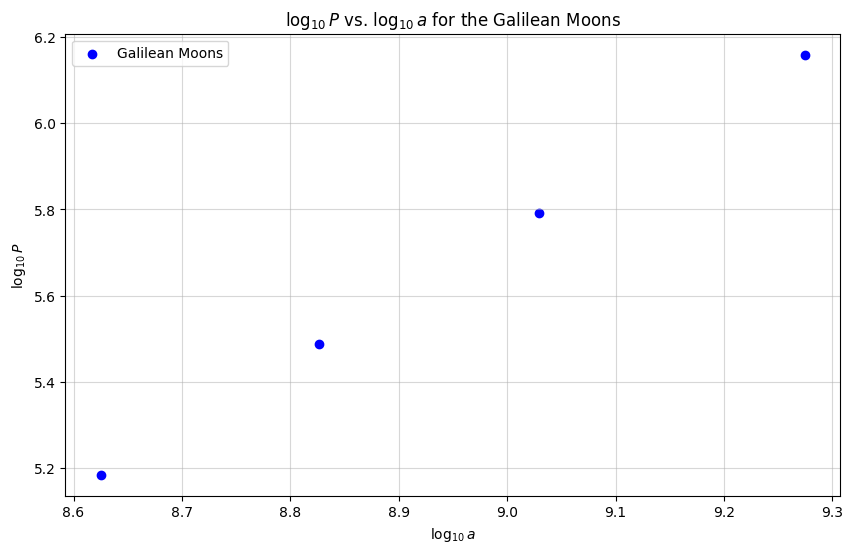

In [3]:
galilean = major_satellites_df[major_satellites_df["Parent Planet"] == "Jupiter"]
galilean = galilean.copy()

# Units conversion
galilean["Orbital Period (s)"] = galilean["Orbital Period (d)"] * 86400
galilean["Semimajor Axis (m)"] = galilean["Semimajor Axis (10^3 km)"] * 1e6

galilean["log_10P"] = np.log10(galilean["Orbital Period (s)"])
galilean["log_10a"] = np.log10(galilean["Semimajor Axis (m)"])

# Plotting log_10P v.s. log_10a
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(galilean["log_10a"], galilean["log_10P"], color='blue', label='Galilean Moons')
ax.set_xlabel(r'$\log_{10}a$')
ax.set_ylabel(r'$\log_{10}P$')
ax.set_title(r'$\log_{10}P$ vs. $\log_{10}a$ for the Galilean Moons')
ax.legend()
ax.grid(visible=True, linestyle="-", alpha=0.5)

plt.savefig('./galilean_moons.svg', format='svg', bbox_inches='tight')
plt.show()

In [4]:
# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(galilean["log_10a"], galilean["log_10P"])

print("Linear regression results:")
print(f"\tSlope = {slope:.5f}")
print(f"\tIntercept = {intercept:.5f}")


Linear regression results:
	Slope = 1.49980
	Intercept = -7.75139
